In [12]:
from os import sep
from random import randrange, seed
from turtle import shape
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
# from xgboost import XGBRegressor
n = 1000
h = np.load(f'H6Length{n}.npy')
h_sp = h[2][1:4]


In [8]:
class cluster:
    def __init__(self,n_tran=17,trun_len = 3):
        self.n_tran = n_tran
        self.mid_tran = self.n_tran//2
        self.trun_len = trun_len
        self.mid_trun = self.trun_len//2
    
    def fitModel(self,neigh=1):
        points = set()
        X = [[]for _ in range(2**self.n_tran)]
        Y = []
        for i in range(2**self.n_tran):
            temp = 0
            co = 0
            sig = []
            for j in range(self.n_tran):
                if (i&(2**j)) != 0:
                    sig += [1]
                else: 
                    sig += [-1]
            o = []
            Y += [sig[self.mid_tran]]
            for j in range(self.mid_trun,self.n_tran - self.mid_trun):
                o += [np.round(np.dot(sig[j-self.mid_trun:j+self.mid_trun+1],h_sp),4)]
            X[i] = o
            points.add(tuple(o)) 
            temp = np.round(temp,4)
        print("number of cluster points:", len(points))
        X = np.array(X)
        Y = np.array(Y)
        print('cluster points shape',X.shape)
        self.model = KNeighborsClassifier(n_neighbors=neigh).fit(X,Y)
        print('error in training:',sum(self.model.predict(X) != Y))
        return self.model
    
    def testModel(self,ebno,num_iteration):
        noisePw = 1/(10**(ebno/10))
        dim = self.n_tran - self.trun_len + 1
        err = []
        for _ in range(num_iteration):
            s = 2*np.random.randint(2,size=(n,1))-1
            noise = np.sqrt(noisePw/2)*np.random.standard_normal((n,1))
            r = np.dot(h,s) + noise
            X_t = np.zeros((n-(self.n_tran-1),dim))
            Y = []
            for i in range(self.mid_tran,n-self.mid_tran):
                for id,val in enumerate(r[i-dim//2:i+dim//2+1]):
                    X_t[i-self.mid_tran][id] = np.round(val,4)
                Y += [1 if s[i] > 0 else -1]

            Y = np.array(Y)
            Y_t = self.model.predict(X_t)
            err += [sum(Y_t != Y)/len(Y)]
        print(np.mean(err))
        return np.mean(err)

number of cluster points: 6
cluster points shape (8, 1)
error in training: 0
0.09771543086172345
number of cluster points: 32
cluster points shape (32, 3)
error in training: 0
0.07035140562248995
number of cluster points: 128
cluster points shape (128, 5)
error in training: 0
0.052092555331991953
number of cluster points: 512
cluster points shape (512, 7)
error in training: 0
0.0436391129032258
number of cluster points: 2048
cluster points shape (2048, 9)
error in training: 0
0.03748484848484848
number of cluster points: 8192
cluster points shape (8192, 11)
error in training: 0
0.037570850202429146


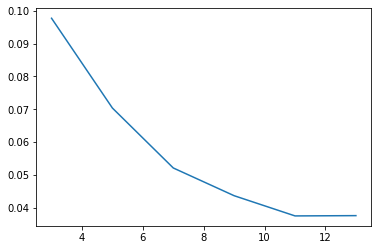

In [5]:
# truncation length = 3
rng = range(3,15,2)
Y = []
for i in rng:
    sysModel = cluster(n_tran=i)
    sysModel.fitModel()
    Y += [sysModel.testModel(ebno=6,num_iteration=100)]

plt.plot(rng,Y)
plt.show()

number of cluster points: 32768
cluster points shape (32768, 13)
error in training: 0
0.07474645030425962
0.03575050709939148
0.01387423935091278
0.004189655172413794


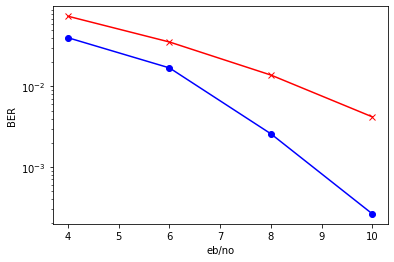

In [14]:
rng = range(4,11,2)
num_it = [10,100,100,1000]
Y = []
sysModel = cluster(n_tran=15,trun_len=3)
sysModel.fitModel()
for i,v in zip(rng,num_it):
    Y += [sysModel.testModel(ebno=i,num_iteration=v)]

uncoded6_SD = [0.0404, 0.017024793388429754, 0.002578268876611418, 0.00026040995230114736]
plt.yscale("log")
plt.plot(rng,Y,'rx-')
plt.plot(rng,uncoded6_SD,'bo-')
plt.ylabel('BER')
plt.xlabel('eb/no')
plt.show()

number of cluster points: 131072
cluster points shape (131072, 13)
error in training: 0
0.04522357723577236
0.018079268292682926
0.003739837398373984
0.0003170731707317074


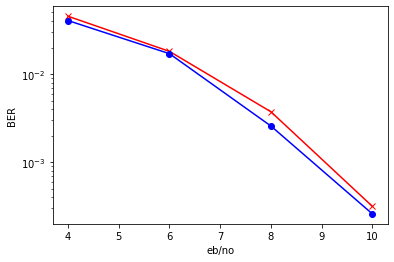

In [11]:
rng = range(4,11,2)
num_it = [10,100,100,1000]
Y = []
sysModel = cluster(trun_len=5)
sysModel.fitModel()
for i,v in zip(rng,num_it):
    Y += [sysModel.testModel(ebno=i,num_iteration=v)]

uncoded6_SD = [0.0404, 0.017024793388429754, 0.002578268876611418, 0.00026040995230114736]
plt.yscale("log")
plt.plot(rng,Y,'rx-')
plt.plot(rng,uncoded6_SD,'bo-')
plt.ylabel('BER')
plt.xlabel('eb/no')
plt.show()